In [1]:
#Dataset @
#https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?resource=download

In [2]:
!pip install -U Cython

In [3]:
!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

  Cloning https://github.com/scikit-multiflow/scikit-multiflow to c:\users\durga\appdata\local\temp\pip-req-build-jfho5vij
  Resolved https://github.com/scikit-multiflow/scikit-multiflow to commit d073a706b5006cba2584761286b7fa17e74e87be
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/scikit-multiflow/scikit-multiflow 'C:\Users\durga\AppData\Local\Temp\pip-req-build-jfho5vij'


In [4]:
%matplotlib notebook

In [32]:
import numpy.core.multiarray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skmultiflow.data import FileStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.meta import LeveragingBaggingClassifier
from skmultiflow.lazy import KNNClassifier
from skmultiflow.evaluation import EvaluatePrequential

In [10]:
url_loan = r'C:\Users\durga\Desktop\Projects\ML\LoanEligibility\loan-train.csv'
stream_loan = FileStream(url_loan,cat_features=[-1])

In [61]:
#nochange classifier - batches of 100
stream_loan.restart()
features, target = stream_loan.next_sample()
current_state = target[0]
total_count = 0
total_right = 0
accuracy_list = []
while stream_loan.has_more_samples():
  features, target = stream_loan.next_sample()
  if current_state == target[0]:
    total_right += 1
  current_state = target[0]
  total_count += 1
  if total_count == 200:
    accuracy_list.append(total_right/total_count)
    total_count = 0
    total_right = 0

np.savetxt('output_NC.csv', (accuracy_list), delimiter=',')
sum(accuracy_list)/len(accuracy_list)

0.605

In [59]:
#majority class classifier - batches of 100
stream_loan.restart()
features, target = stream_loan.next_sample()
max_list = [0,0] #for 2 target classes
accuracy_list = []
while stream_loan.has_more_samples():
  features, target = stream_loan.next_sample()
  if max_list.index(max(max_list)) == target[0]:
    total_right += 1
  max_list[target[0]] += 1
  total_count += 1
  if total_count == 200:
    accuracy_list.append(total_right/total_count)
    max_list=[0,0]
    total_count = 0
    total_right = 0

np.savetxt('output_MC.csv', (accuracy_list), delimiter=',')
sum(accuracy_list)/len(accuracy_list)

0.7140000000000001

In [72]:
stream_loan.restart()
classifier = [HoeffdingTreeClassifier(), SAMKNNClassifier(max_window_size=200), HoeffdingAdaptiveTreeClassifier()]
eval_loan = EvaluatePrequential(pretrain_size=100, batch_size=100,max_time=1000, metrics=['accuracy'], output_file="output_loan_HT_SAMKNN_HAT.csv")
eval_loan.evaluate(stream=stream_loan, model=classifier, model_names=['HT', 'SAMKNN', 'HAT'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 100 sample(s).
Evaluating...
 ##################-- [92%] [1.48s]
Processed samples: 1000
Mean performance:
HT - Accuracy     : 0.7684
SAMKNN - Accuracy     : 0.7412
HAT - Accuracy     : 0.7684


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05),
 SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=True,
                  weighting='distance'),
 HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                 grace_period=200, leaf_prediction='nba',
                                 max_byte_size=33554432,
                                 memory_estimate_period=1000000, nb_threshold=0,
                                 no_prepru

In [29]:
stream_loan.restart()
classifier_arf = AdaptiveRandomForestClassifier()
evaluator_loan = EvaluatePrequential(pretrain_size=100, batch_size=100,max_time=1000, output_file="output_abrupt_arf.csv",
                                metrics=['accuracy'])

evaluator_loan.evaluate(stream=stream_loan, model=classifier_arf)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 100 sample(s).
Evaluating...
 ##################-- [92%] [4.92s]
Processed samples: 1000
Mean performance:
M0 - Accuracy     : 0.7753


[AdaptiveRandomForestClassifier(binary_split=False, disable_weighted_vote=False,
                                drift_detection_method=ADWIN(delta=0.001),
                                grace_period=50, lambda_value=6,
                                leaf_prediction='nba', max_byte_size=33554432,
                                max_features=3, memory_estimate_period=2000000,
                                n_estimators=10, nb_threshold=0,
                                no_preprune=False, nominal_attributes=None,
                                performance_metric='acc', random_state=None,
                                remove_poor_atts=False, split_confidence=0.01,
                                split_criterion='info_gain',
                                stop_mem_management=False, tie_threshold=0.05,
                                warning_detection_method=ADWIN(delta=0.01))]

In [30]:
stream_loan.restart()
classifier_LB = LeveragingBaggingClassifier(base_estimator=KNNClassifier(max_window_size=100))
evaluator_loan_lb = EvaluatePrequential(pretrain_size=100, batch_size=100,max_time=1000, output_file="output_abrupt_LB.csv",
                                        metrics=['accuracy'])

evaluator_loan_lb.evaluate(stream=stream_loan, model=classifier_LB)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 100 sample(s).
Evaluating...
 ##################-- [92%] [5.48s]
Processed samples: 1000
Mean performance:
M0 - Accuracy     : 0.6266


[LeveragingBaggingClassifier(base_estimator=KNNClassifier(leaf_size=30,
                                                          max_window_size=100,
                                                          metric='euclidean',
                                                          n_neighbors=5),
                             delta=0.002, enable_code_matrix=False,
                             leverage_algorithm='leveraging_bag',
                             n_estimators=10, random_state=None, w=6)]

In [73]:
#Performance graphs
df_nc = pd.read_csv(r'C:\Users\durga\Desktop\Projects\ML\LoanEligibility\output_NC.csv', names=['Accu_NC'])
df_mc = pd.read_csv(r'C:\Users\durga\Desktop\Projects\ML\LoanEligibility\output_MC.csv', names=['Accu_MC'])
df_htsamknnhat = pd.read_csv(r'C:\Users\durga\Desktop\Projects\ML\LoanEligibility\output_loan_HT_SAMKNN_HAT.csv')
df_arf = pd.read_csv(r'C:\Users\durga\Desktop\Projects\ML\LoanEligibility\output_abrupt_arf.csv')
df_lb = pd.read_csv(r'C:\Users\durga\Desktop\Projects\ML\LoanEligibility\output_abrupt_LB.csv')

In [74]:
i = 100
id_list = []
#gradual
while i<900:
    id_list.append(i)
    i += 200
df_nc['id'] = id_list
id_list.append(i)
df_mc['id'] = id_list

In [75]:
df = df_nc.merge(df_mc, how='outer', on='id')
df = df_htsamknnhat.merge(df, how='outer', on='id')
df = df_arf.merge(df, how='outer', on='id')
df = df_lb.merge(df, how='outer', on='id')
df = df.drop(columns=['current_acc_[HT]', 'current_acc_[SAMKNN]','current_acc_[HAT]', 'current_acc_[M0]_x', 'current_acc_[M0]_y'])
df = df.rename(columns={"mean_acc_[HT]": "Accu_HT", "mean_acc_[SAMKNN]": "Accu_SAMKNN", "mean_acc_[HAT]": "Accu_HAT", "mean_acc_[M0]_x": "Accu_arf", "mean_acc_[M0]_y": "Accu_lb"})

In [76]:
df

,id,Accu_arf,Accu_lb,Accu_HT,Accu_SAMKNN,Accu_HAT,Accu_NC,Accu_MC
0,100,0.710000,0.710000,0.690000,0.650000,0.690000,0.580,0.715
1,300,0.613333,0.760000,0.773333,0.696667,0.773333,0.595,0.640
2,500,0.606000,0.780000,0.794000,0.684000,0.794000,0.520,0.705
3,700,0.602857,0.765714,0.777143,0.720000,0.777143,0.725,0.685
4,900,0.626561,0.775255,0.768445,0.741203,0.768445,NaN,0.825


<IPython.core.display.Javascript object>


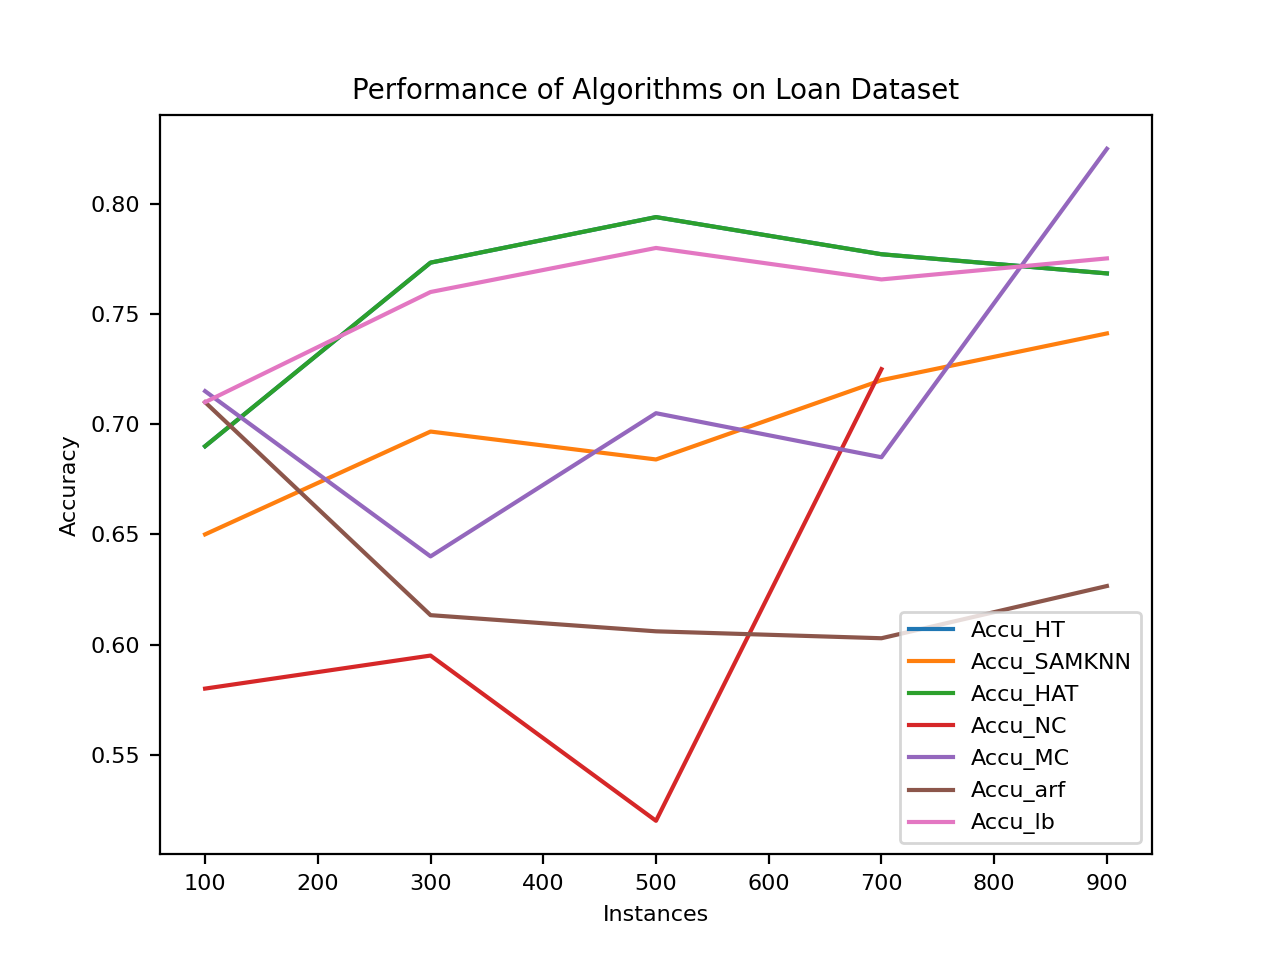

<AxesSubplot: title={'center': 'Performance of Algorithms on Loan Dataset'}, xlabel='Instances', ylabel='Accuracy'>

In [78]:
df.plot(x='id', y=['Accu_HT', 'Accu_SAMKNN', 'Accu_HAT', 'Accu_NC', 'Accu_MC', 'Accu_arf', 'Accu_lb'], title="Performance of Algorithms on Loan Dataset", xlabel="Instances",ylabel="Accuracy")